<a href="https://colab.research.google.com/github/gianmarcomejia96/AIfundamentals/blob/main/12_Neural_Network_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning examples with Keras and Tensorflow

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library

from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop, SGD
from keras.utils import to_categorical, plot_model

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Dataset

In [ ]:
from keras.datasets import mnist

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

11490434/11490434 [==============================] - 0s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


Data visualizaction

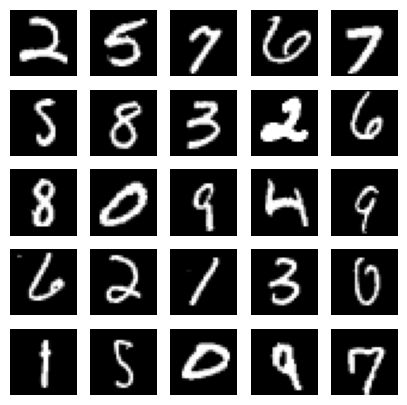

In [ ]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

Onehot encoding

In [ ]:
# compute the number of labels
num_labels = len(np.unique(y_train))
print(num_labels)
print(y_train)

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train)

10
[5 0 4 ... 5 6 8]
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


Data procesing

In [ ]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

Normalize

In [ ]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size]) # en vector
x_train = x_train.astype('float32') / 255 # escalar
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

#Neural Network

Model

In [ ]:
# network parameters
batch_size = 128
hidden_units = 256 # neurons in hidden layer
dropout = 0.45 # para evitar el overfitting

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu')) # max[0, z], evita el problema de desvanecimiento de gradientes
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

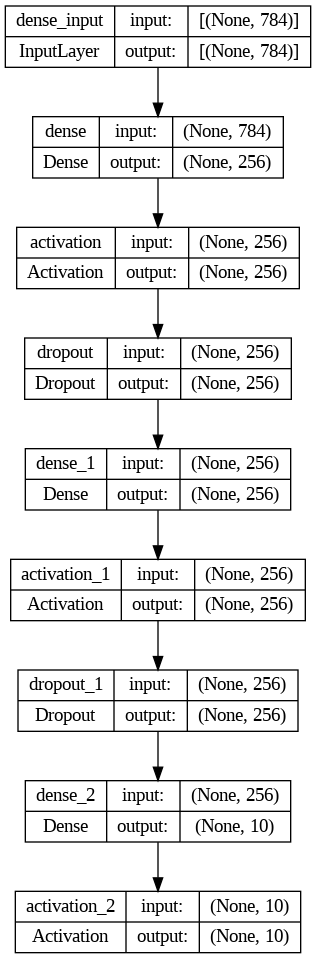

In [ ]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

Train

In [ ]:
optimizer = SGD(learning_rate=0.01) # stocasthic gradient descent, use son part of the reaining samples in each iteration

model.compile(loss='categorical_crossentropy', # cost function
              optimizer=optimizer,
              metrics=['accuracy']) # metrics

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=1, # to detail information in trainig
                    validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 6s 4ms/step - loss: 1.6568 - accuracy: 0.4616 - val_loss: 0.7833 - val_accuracy: 0.8500
Epoch 2/10
422/422 [==============================] - 1s 3ms/step - loss: 0.8959 - accuracy: 0.7179 - val_loss: 0.4543 - val_accuracy: 0.8930
Epoch 3/10
422/422 [==============================] - 1s 3ms/step - loss: 0.6782 - accuracy: 0.7903 - val_loss: 0.3567 - val_accuracy: 0.9068
Epoch 4/10
422/422 [==============================] - 1s 4ms/step - loss: 0.5847 - accuracy: 0.8218 - val_loss: 0.3105 - val_accuracy: 0.9185
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.5249 - accuracy: 0.8415 - val_loss: 0.2824 - val_accuracy: 0.9252
Epoch 6/10
422/422 [==============================] - 3s 7ms/step - loss: 0.4847 - accuracy: 0.8552 - val_loss: 0.2629 - val_accuracy: 0.9275
Epoch 7/10
422/422 [==============================] - 2s 4ms/step - loss: 0.4499 - accuracy: 0.8662 - val_loss: 0.2456 - val_accuracy: 0.9315
Epoch 

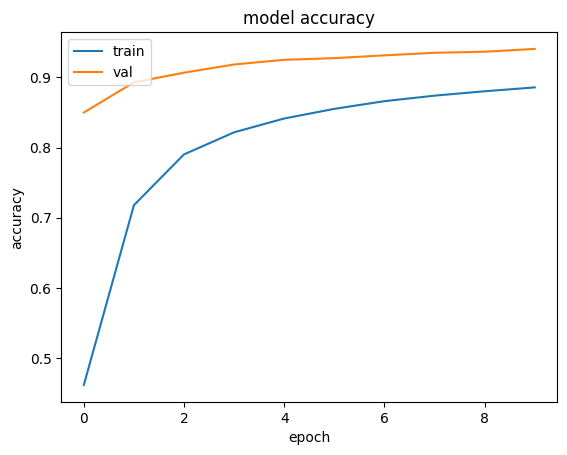

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Evaluation

In [ ]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 4ms/step - loss: 0.2469 - accuracy: 0.9293

Test accuracy: 92.9%


#CNN

In [ ]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train[0].shape

#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), shuffle=True, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 12s 5ms/step - loss: 0.4248 - accuracy: 0.8717 - val_loss: 0.1793 - val_accuracy: 0.9480
Epoch 2/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1363 - accuracy: 0.9607 - val_loss: 0.1039 - val_accuracy: 0.9691
Epoch 3/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0940 - accuracy: 0.9726 - val_loss: 0.0785 - val_accuracy: 0.9752
Epoch 4/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0770 - accuracy: 0.9773 - val_loss: 0.0824 - val_accuracy: 0.9747


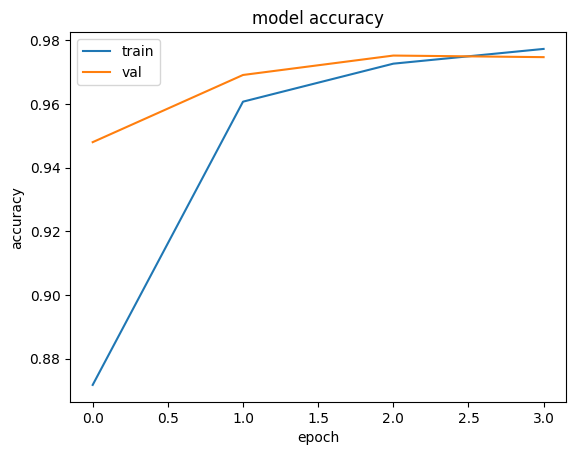

In [ ]:
import matplotlib.pyplot as plt # plotting library
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0824 - accuracy: 0.9747

Test accuracy: 97.5%
